In [1]:
#please install the following packages before running the code
# pip install keras-unet-collection
# pip install tensorflow
# pip install numpy
# pip install matplotlib

import tensorflow as tf
from tensorflow import keras

In [2]:
from keras_unet_collection import models

#This is the U-net model  just for refrence
Attention U-net is applied for this segmentation task. 



U-net for binary classification with:

Five down- and upsampliung levels (or four downsampling levels and one bottom level).

Two convolutional layers per downsampling level.

One convolutional layer (after concatenation) per upsamling level.

Gaussian Error Linear Unit (GELU) activcation, Softmax output activation, batch normalization.

Downsampling through Maxpooling.

Upsampling through reflective padding.

In [3]:
model = models.unet_2d((128, 128, 1), [64, 128, 256, 512, 1024], n_labels=2,
                      stack_num_down=2, stack_num_up=1,
                      activation='GELU', output_activation='Softmax',
                      batch_norm=True, pool='max', unpool='nearest', name='unet')

Attention U-net is applied for this segmentation task. 
This architecture is modified from the conventionally used U-net by assigning attention gates on each upsampling level.

Attention-Unet Attention-Unet for binary classification:

Four down- and upsampling levels.

Two convolutional layers per downsampling level.

Two convolutional layers (after concatenation) per upsampling level.

ReLU activation, linear output activation (None), batch normalization.

Additive attention, ReLU attention activation.

Downsampling through stride convolutional layers.

In [25]:
model = models.att_unet_2d((128, 128, 1), filter_num=[64, 128, 256, 512, 1024], n_labels=2,
                           stack_num_down=2, stack_num_up=2, activation='ReLU',
                           atten_activation='ReLU', attention='add', output_activation='Sigmoid',
                           batch_norm=True, pool=False, unpool=False,
                           #@backbone='VGG16', weights='imagenet',
                           #freeze_backbone=True, freeze_batch_norm=True,
                           name='attunet')

In [26]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(learning_rate=1e-2))

In [7]:
import numpy as np


In [8]:
#just load the data and train the model
#swap the axes
train=np.load('train_np.npy')
train=np.swapaxes(train,2,0)
train=np.swapaxes(train,2,1)
label=np.load('label_np.npy')
label=np.swapaxes(label,2,0)
label=np.swapaxes(label,2,1)
print(train.shape)

(4000, 128, 128)


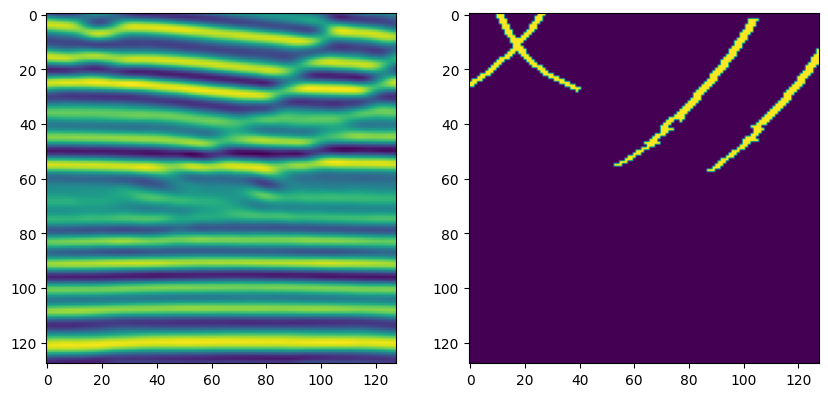

In [9]:
#plot the images in one row
n=10
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(train[n])
plt.subplot(2,2,2)
plt.imshow(label[n])
plt.show()





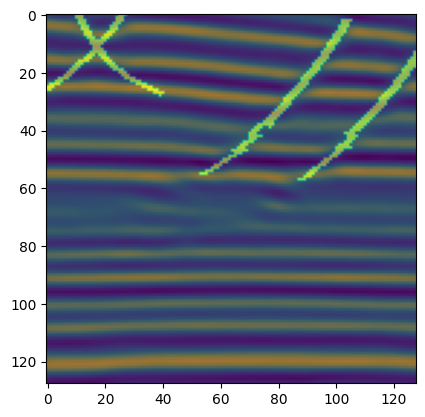

In [10]:
#plot train[0]  label[0]  and overlay
import matplotlib.pyplot as plt
plt.imshow(train[n])
plt.imshow(label[n],alpha=0.5)
plt.show()


In [11]:
def target_data_process(target_array):
    '''Converting faults, non-faults pixels into two categories.'''
    target_array[target_array>0]=1 # grouping all other non-faults categories
    return keras.utils.to_categorical(target_array, num_classes=2)

In [12]:
label_cl=target_data_process(label)

In [27]:
#this is a simple way of training the model
#model.fit(train, label_cl, batch_size=10, epochs=10, verbose=1, validation_split=0.2)
Training = model.fit(train, label_cl, batch_size=10, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
320/320 [==============================] - 32s 97ms/step - loss: 0.1211 - val_loss: 0.0918
Epoch 2/20
320/320 [==============================] - 31s 97ms/step - loss: 0.0854 - val_loss: 0.0894
Epoch 3/20
320/320 [==============================] - 30s 95ms/step - loss: 0.0833 - val_loss: 0.0875
Epoch 4/20
320/320 [==============================] - 30s 93ms/step - loss: 0.0815 - val_loss: 0.0859
Epoch 5/20
320/320 [==============================] - 30s 92ms/step - loss: 0.0798 - val_loss: 0.0839
Epoch 6/20
320/320 [==============================] - 29s 91ms/step - loss: 0.0779 - val_loss: 0.0816
Epoch 7/20
320/320 [==============================] - 29s 90ms/step - loss: 0.0756 - val_loss: 0.0787
Epoch 8/20
320/320 [==============================] - 29s 90ms/step - loss: 0.0727 - val_loss: 0.0748
Epoch 9/20
320/320 [==============================] - 29s 91ms/step - loss: 0.0691 - val_loss: 0.0706
Epoch 10/20
320/320 [==============================] - 28s 89ms/step - loss: 0.065

In [28]:
#prdedit the output
input_data=train[3600:3601]
input_label=label_cl[3600:3601]
pred=model.predict(input_data)
pred0=np.reshape(pred[0,:,:,1],(128,128))
print(pred0.shape)
pred0[pred0>0.5]=1
pred0[pred0<=0.5]=0
#plot the output and the label and the input in one figure



1/1 [==============================] - 0s 223ms/step
(128, 128)


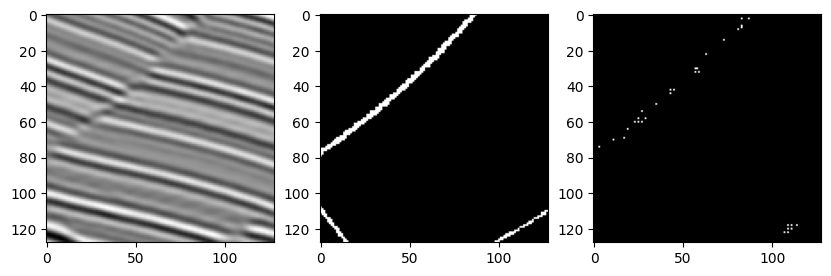

In [29]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(input_data[0,:,:],cmap='gray')
plt.subplot(1,3,2)
plt.imshow(input_label[0,:,:,1],cmap='gray')    
plt.subplot(1,3,3)
plt.imshow(pred0,cmap='gray')
plt.show()